<a href="https://colab.research.google.com/github/Jorayala/AI_Machine_Learning_2024/blob/main/laboratorioCNN2_Copy1_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación de imágenes conjunto de datos Fashion MNIST
## Actividad Práctica

En esta sección se empleará el conjunto de datos Fashion MNIST, una colección de imágenes que representa prendas de vestir, calzado y accesorios en el mundo de la moda. Fashion MNIST es ampliamente reconocido en el campo del aprendizaje automático y la visión por computadora como una alternativa al conjunto de datos Digits MNIST. Al igual que Digits MNIST, el conjunto de datos Fashion MNIST consta de 70.000 imágenes en blanco y negro. De estas, 60.000 están destinadas al entrenamiento de modelos, mientras que las 10.000 restantes se reservan para pruebas y evaluación de rendimiento. Cada imagen tiene una dimensión de 28 x 28 píxeles y se representa en un solo canal de color.

En este laboratorio, se utilizará el conjunto de datos Fashion MNIST con el objetivo de diseñar y entrenar un modelo neuronal convolucional (CNN) para alcanzar una precisión de clasificación superior al 90% en el conjunto de prueba. Te proporcionaremos una función que crea la arquitectura inicial del modelo CNN y una plantilla de compilación. Tu tarea es ajustar esta arquitectura y la configuración de compilación de acuerdo con tus conocimientos. Tienes total libertad para agregar, eliminar o ajustar elementos en la arquitectura y cambiar los hiperparámetros según sea necesario. Además puedes usar las funciones de validación y visualización de resultados para observar el desempeño de tu modelo. Cuando consideres que tu modelo ha superado el umbral del 90% de precisión, podrás enviarlo para su evaluación interna.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Celda con la importación de librerias

import tensorflow as tf         # Importar TensorFlow
from tensorflow import keras    # Importar la APItensorflow.keras de TensorFlow

import numpy as np              # Librería para trabajar don datos matriciales

import matplotlib.pyplot as plt # Librería para gráficas y visualización

# Inicialización de semillas
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
# Conjunto de datos Fashion MNIST
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
# Librería para codificar etiquetas en one-hot
from tensorflow.keras.utils import to_categorical

In [ ]:
def load_data(mnist):
    """
    Esta función carga al entorno de trabajo los datos de entrenamiento, y prueba. Con sus
    etiquetas codificadas con one-hot.
    Parámetros de entrada:
    mnist = Clase detensorflow.keras.datsets con el conjunto de datos fashion mnist
    Parámetros de salida:
    X_train = Conjunto de datos para entrenamiento
    X_test = Conjunto de datos para prueba
    y_train_onehot = Etiquetas del conjunto de entrenamiento codificadas en one-hot
    y_test_onehot = Etiquetas del conjunto de prueba codificadas en one-hot
    y_train = Etiqueta original del conjunto de entrenamiento
    y_test = Etiqueta original del conjunto de prueba
    """

    # Establecer el conjunto de entrenamiento y el conjunto de prueba con sus respectivas
    # etiquetas
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    # Normalización de los valores de los pixeles de las imágenes
    X_train, X_test = X_train / 255.0, X_test / 255.0

    # Codificación One-Hot para las etiquetas
    y_train_onehot = to_categorical(y_train)
    y_test_onehot =  to_categorical(y_test)

    print(f'Conjunto de datos cargados')
    print(f'Tamaño imágenes de entrenamiento {X_train.shape}')
    print(f'Tamaño imágenes de test {X_test.shape}')
    print(f'Datos por cada etiqueta en X train {np.bincount(y_train)}')

    return X_train.reshape((60000, 28, 28, 1)), X_test.reshape((10000, 28, 28, 1)), y_train_onehot, y_test_onehot, y_train, y_test
### END READ ONLY

In [ ]:
X_train, X_test, y_train_onehot, y_test_onehot, y_train, y_test = load_data(fashion_mnist)

Conjunto de datos cargados
Tamaño imágenes de entrenamiento (60000, 28, 28)
Tamaño imágenes de test (10000, 28, 28)
Datos por cada etiqueta en X train [6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]


In [ ]:
def visualize_instances(X_data, y_data):
    """
    Esta función visualiza una instancia de cada categoria del conjunto mnist
    Parámetros de entrada:
    X_data = Instancias
    y_data = Etiquetas
    Parámetros de salida:
    Grafica con la visualización de la imagen por cada isntancia.
    """
    fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True, figsize=(10, 5))
    ax = ax.flatten()
    for i in range(10):
        img = X_data[y_data == i][0].reshape((28, 28))
        ax[i].imshow(img, cmap='gist_yarg')
        ax[0].set_xticks([])
        ax[0].set_yticks([])
    return plt.show()

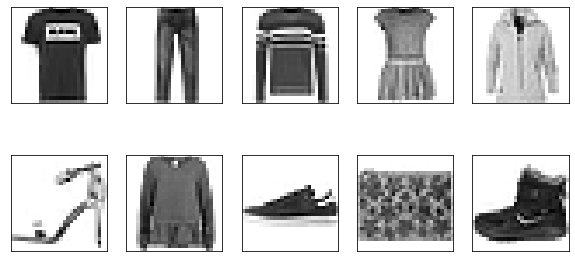

In [ ]:
visualize_instances(X_train, y_train)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten

def load_model():
    """
    Esta función construye un modelo neuronal convolucional para el problema de clasificación
    con Fashion MNIST.

    Modifica esta función a tu gusto.

    Salida:
    model = modelo neuronal convolucional entensorflow.keras
    """

    # Inicio del modelo con el nombre pasado por parámetro
    model = Sequential()

    # Capa de entrada dimensiones consistentes con las dimensiones de las imágenes de MNIST
    model.add(Input(shape=(28, 28, 1), name = 'Input'))

    # Modifica las capas como consideres necesario

    # Ingresa tu código aqui

    # Primera capa convolucinal Kernel de 3x3 y 2 filtros
    model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
    # Capa de MaxPooling
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Segunda capa convolucinal Kernel de 3x3 y 32 filtros
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    # Capa de MaxPooling
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Tercer bloque convolucional
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))  # Añadir una capa adicional de 64 filtros
    model.add(MaxPooling2D(pool_size=(2, 2)))


    # Capa de aplanamiento
    model.add(Flatten())

    # Capa de salida
    model.add(Dense(10, activation='softmax', name = 'Output'))

    return model

In [ ]:
# Compilar y entrenar el modelo

# También puedes modificar esta celda, cambiando parámetros de la compilación o del
# entrenamiento.

from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)

model = load_model()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
resultsFit = model.fit(X_train, y_train_onehot,
                    epochs=30,
                    batch_size = 64,
                    validation_data=(X_test, y_test_onehot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 46s 768us/sample - loss: 0.5553 - accuracy: 0.8034 - val_loss: 0.4164 - val_accuracy: 0.8516
Epoch 2/30
60000/60000 [==============================] - 45s 758us/sample - loss: 0.3513 - accuracy: 0.8750 - val_loss: 0.3598 - val_accuracy: 0.8706
Epoch 3/30
60000/60000 [==============================] - 45s 754us/sample - loss: 0.3099 - accuracy: 0.8888 - val_loss: 0.3189 - val_accuracy: 0.8839
Epoch 4/30
60000/60000 [==============================] - 45s 752us/sample - loss: 0.2813 - accuracy: 0.8979 - val_loss: 0.3064 - val_accuracy: 0.8903
Epoch 5/30
60000/60000 [==============================] - 45s 750us/sample - loss: 0.2635 - accuracy: 0.9043 - val_loss: 0.2783 - val_accuracy: 0.9020
Epoch 6/30
60000/60000 [==============================] - 45s 747us/sample - loss: 0.2449 - accuracy: 0.9119 - val_loss: 0.3016 - val_accuracy: 0.8861
Epoch 7/30
60000/60000 [====================

In [ ]:
def visualization_history(resultsFit):
    """
    Esta función grafica las curvas de precisión a lo largo de las épocas de entrenamiento
    para el conjunto de prueba como el de validación.
    Parámetros:
    resultsFit = historial de entrenamiento de un modelo entensorflow.keras
    Salida:
    Gráfica de la precisión en validación y prueba.
    """
    # Llamado al entrono de la gráfica y fijar tamaño de visualización
    fig, axes = plt.subplots(1, 2, figsize=(13, 5))

    # Graficar la presición de la historia en entrenamiento
    axes[0].plot(range(len(resultsFit.history['accuracy'])), resultsFit.history['accuracy'],
           '#5a2ff4', linestyle = "-", marker = "o",
           label='Precisión entrenamiento', lw = 3)

    # Graficar la presición de la historia en validación
    axes[0].plot(range(len(resultsFit.history['val_accuracy'])), resultsFit.history['val_accuracy'],  '#60d13e',
           label='Precisión validación', linestyle = '-', marker = 'o', lw = 3)

    # Umbral 90% de precisión
    axes[0].plot(range(len(resultsFit.history['val_accuracy'])), 0.9*np.ones(len(resultsFit.history['val_accuracy'])),
               'red', lw = 3, label = 'Umbral')

    # Títulos de los ejes
    axes[0].set_xlabel('Época',fontsize=16)
    axes[0].set_ylabel(r'Precisión',fontsize=16)
    axes[0].set_ylim(top=1) # Límite de la grafica
    axes[0].grid()      # Activar la cuadricula
    axes[0].legend(fontsize=14,loc = 'lower right')   # Establecer la legenda


    # Graficar la pérdida de la historia en entrenamiento
    axes[1].plot(range(len(resultsFit.history['loss'])), resultsFit.history['loss'],
           '#5a2ff4', linestyle = "-", marker = "o",
           label='Pérdida entrenamiento', lw = 3)

    # Graficar la presición de la historia en validación
    axes[1].plot(range(len(resultsFit.history['val_loss'])), resultsFit.history['val_loss'],  '#60d13e',
           label='Pérdida validación', linestyle = '-', marker = 'o', lw = 3)

    # Títulos de los ejes
    axes[1].set_xlabel('Época',fontsize=16)
    axes[1].set_ylabel(r'Pérdida',fontsize=16)
    axes[1].grid()      # Activar la cuadricula
    axes[1].legend(fontsize=14,loc = 'upper right')   # Establecer la legenda


    plt.tight_layout() # Ajusta automáticamente el diseño de la figura
    plt.show()

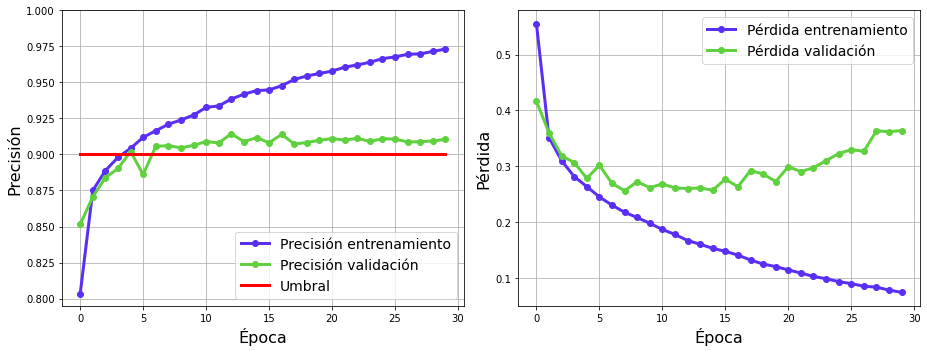

In [ ]:
# Llamado a la función de visualización de las métricas de la historia del entrenamiento
# del modelo, en la prrimera gráfica se presenta la precisión y en la segunda la pérdida
visualization_history(resultsFit)

**Verifica que tu modelo supere el umbral de precisión del 90%, para esto las curvas de precisión en el conjunto de prueba, (curva de color verde) debe situarse por encima de la linea de color rojo.** Cuando estes listo selecciona el botón **Enviar tarea**, al enviar tu laboratorio se calificará automáticamente.

**Ayuda:** Puedes intentar cambiando el optimizador a la clase **adam**, modificar en la arquitectura base de 2 filtros a 16 en la primera capa convolucional y agregar otra capa convolucional de 32 filtros. Probando esta configuración de seguro se supera el umbral